# Importing Dependencies

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline

# Warnings handling
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HSBK.IL.csv to HSBK.IL.csv


In [3]:
#Importing Dataset
df = pd.read_csv('HSBK.IL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-12-14,21.000000,21.250000,19.650000,20.900000,10.812446,29641866.0
1,2006-12-15,20.950001,21.000000,19.799999,19.799999,10.243370,3114505.0
2,2006-12-18,19.900000,19.900000,19.740000,19.750000,10.217505,2540956.0
3,2006-12-19,19.700001,19.770000,19.650000,19.740000,10.212332,3909766.0
4,2006-12-20,19.950001,20.209999,19.850000,19.980000,10.336493,1101890.0


In [4]:
df.shape

(4055, 7)

In [5]:
df.reset_index(inplace=True)
df.describe()

,index,Open,High,Low,Close,Adj Close,Volume
count,4055.000000,4055.000000,4055.000000,4055.000000,4055.000000,4055.000000,4.055000e+03
mean,2027.000000,10.119367,10.271884,9.951793,10.105380,6.305141,1.509099e+05
std,1170.721999,4.441502,4.513357,4.390709,4.432641,3.283938,5.697013e+05
min,0.000000,1.650000,1.650000,1.610000,1.630000,0.843267,0.000000e+00
25%,1013.500000,7.100000,7.152000,7.000000,7.057500,3.794481,1.933750e+04
50%,2027.000000,9.595000,9.740000,9.450000,9.600000,5.354489,5.994900e+04
75%,3040.500000,12.000000,12.150000,11.850000,11.975000,8.691344,1.538645e+05
max,4054.000000,26.900000,46.360031,26.389999,26.400000,16.577885,2.964187e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4055 entries, 0 to 4054
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      4055 non-null   int64  
 1   Date       4055 non-null   object 
 2   Open       4055 non-null   float64
 3   High       4055 non-null   float64
 4   Low        4055 non-null   float64
 5   Close      4055 non-null   float64
 6   Adj Close  4055 non-null   float64
 7   Volume     4055 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 253.6+ KB


# Check for Correlation

In [7]:
corr = df.corr(method='pearson')
corr

,index,Open,High,Low,Close,Adj Close,Volume
index,1.000000,0.013830,0.012998,0.012368,0.014204,0.414389,-0.135811
Open,0.013830,1.000000,0.995753,0.998237,0.998002,0.872525,0.105739
High,0.012998,0.995753,1.000000,0.994658,0.995665,0.870709,0.109478
Low,0.012368,0.998237,0.994658,1.000000,0.998755,0.871437,0.100391
Close,0.014204,0.998002,0.995665,0.998755,1.000000,0.874350,0.106420
Adj Close,0.414389,0.872525,0.870709,0.871437,0.874350,1.000000,0.048496
Volume,-0.135811,0.105739,0.109478,0.100391,0.106420,0.048496,1.000000


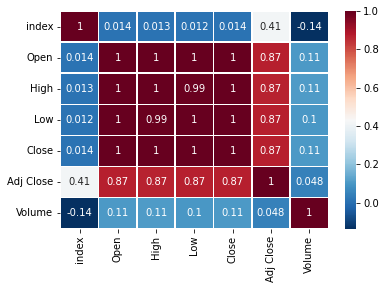

In [8]:
import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

# Exploratory Data Analysis

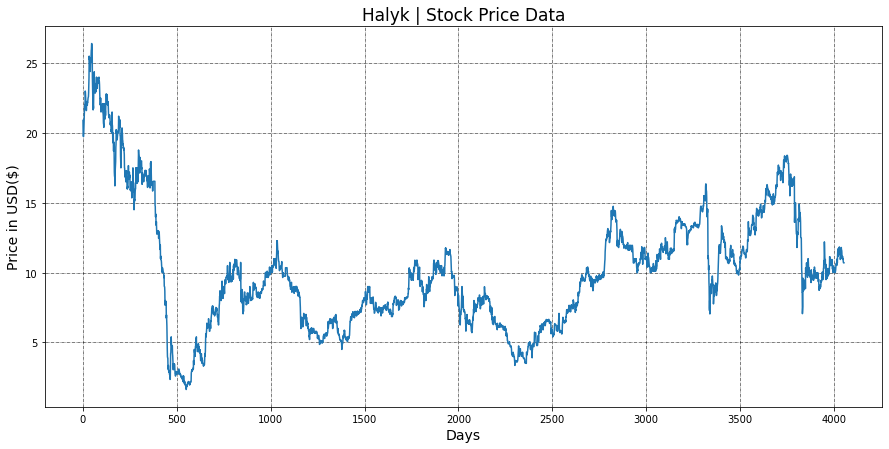

In [9]:
#Exploratory Data Analysis
df['Close'].plot(figsize=(15, 7))
plt.title("Halyk | Stock Price Data", fontsize=17)
plt.ylabel('Price in USD($)', fontsize=14)
plt.xlabel('Days', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [10]:
df.tail()

,index,Date,Open,High,Low,Close,Adj Close,Volume
4050,4050,2023-01-17,10.98,11.02,10.80,10.86,10.86,65301.0
4051,4051,2023-01-18,10.86,10.90,10.64,10.76,10.76,54901.0
4052,4052,2023-01-19,10.88,10.90,10.56,10.70,10.70,147872.0
4053,4053,2023-01-20,10.86,11.00,10.68,10.70,10.70,66240.0
4054,4054,2023-01-23,10.80,11.20,10.70,10.70,10.70,98329.0


In [11]:
#Prepare dataset to work with 
nflx_df=df[['Date','High','Open','Low','Close']]
nflx_df.head(10)

,Date,High,Open,Low,Close
0,2006-12-14,21.250000,21.000000,19.650000,20.900000
1,2006-12-15,21.000000,20.950001,19.799999,19.799999
2,2006-12-18,19.900000,19.900000,19.740000,19.750000
3,2006-12-19,19.770000,19.700001,19.650000,19.740000
4,2006-12-20,20.209999,19.950001,19.850000,19.980000
5,2006-12-21,20.530001,20.000000,20.000000,20.530001
6,2006-12-22,21.100000,21.000000,20.900000,20.900000
7,2006-12-27,21.500000,21.000000,21.000000,21.350000
8,2006-12-28,22.049999,21.350000,21.250000,21.650000
9,2006-12-29,22.299999,21.700001,21.693501,22.000000


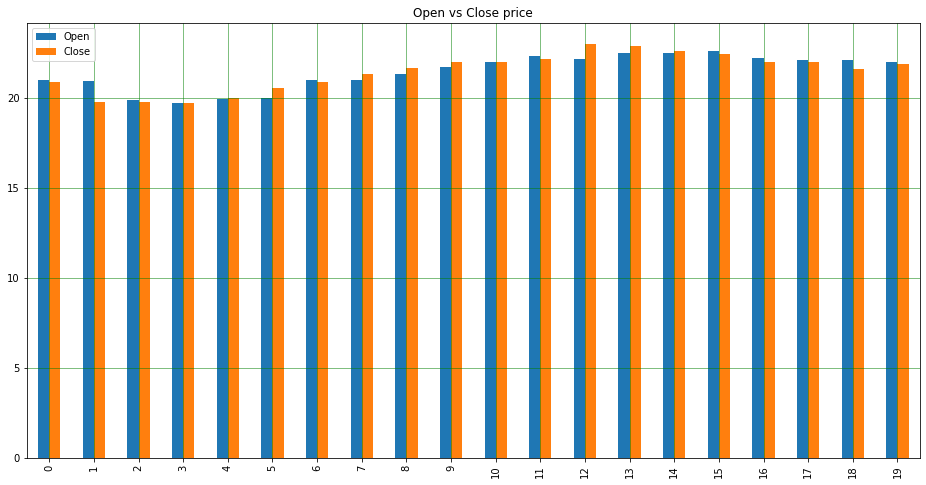

In [12]:
#Plot Open vs Close
nflx_df[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.title('Open vs Close price')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

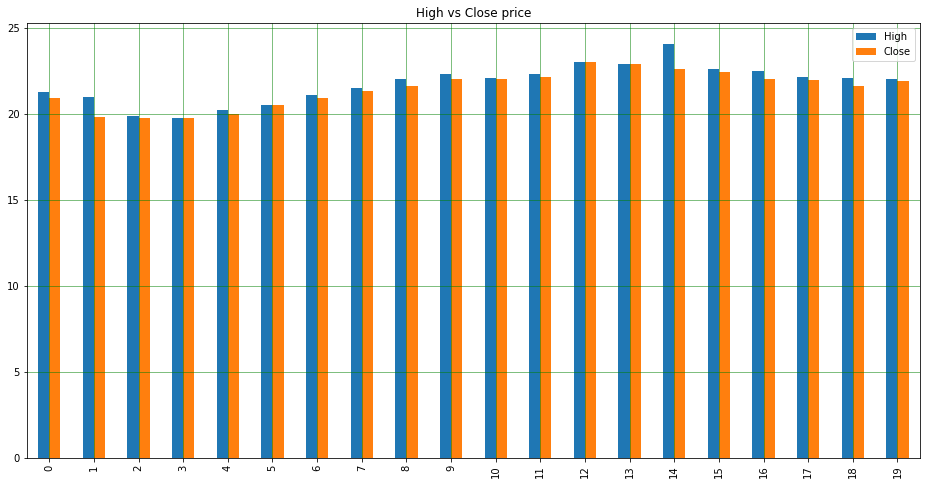

In [13]:
#Plot High vs Close
nflx_df[['High','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.title('High vs Close price')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

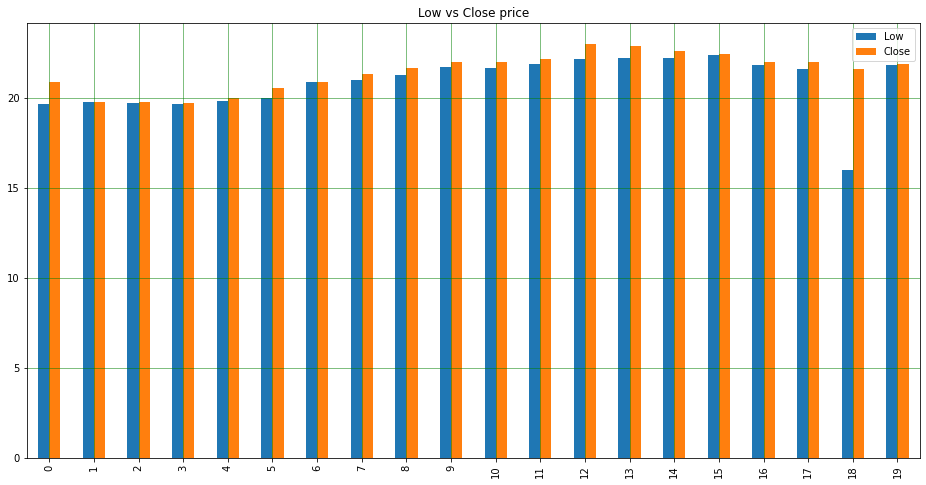

In [14]:
#Plot Low vs Close
nflx_df[['Low','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.title('Low vs Close price')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Model Training and Testing

In [15]:
nfx_df=nflx_df[['High','Open','Low','Close']]
nfx_df.head(10)

,High,Open,Low,Close
0,21.250000,21.000000,19.650000,20.900000
1,21.000000,20.950001,19.799999,19.799999
2,19.900000,19.900000,19.740000,19.750000
3,19.770000,19.700001,19.650000,19.740000
4,20.209999,19.950001,19.850000,19.980000
5,20.530001,20.000000,20.000000,20.530001
6,21.100000,21.000000,20.900000,20.900000
7,21.500000,21.000000,21.000000,21.350000
8,22.049999,21.350000,21.250000,21.650000
9,22.299999,21.700001,21.693501,22.000000


In [16]:
#separate Independent and dependent variable
X = nfx_df.iloc[:,nfx_df.columns !='Close']
Y = nfx_df.iloc[:, 3]

In [17]:
print(X.shape) #output: (4055, 3)
print(Y.shape) #output: (4055,)

(4055, 3)
(4055,)


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

In [19]:
print(x_train.shape) #output: (3041, 3)
print(x_test.shape) #output: (1014, 3)
print(y_train.shape) #output: (3041,)
print(y_test.shape) #output: (1014,)
#y_test to be evaluated with y_pred for Diff models

(3041, 3)
(1014, 3)
(3041,)
(1014,)


# Linear Regression Model Training and Testing


In [20]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=lr_model.predict(x_test)

# Linear Regression Model Cross-Validation

In [22]:
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(lr_model, x_test, y_test.astype('int'), cv=kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  98.18426324805907


# Linear Regression Model - Data Visualization (Results)

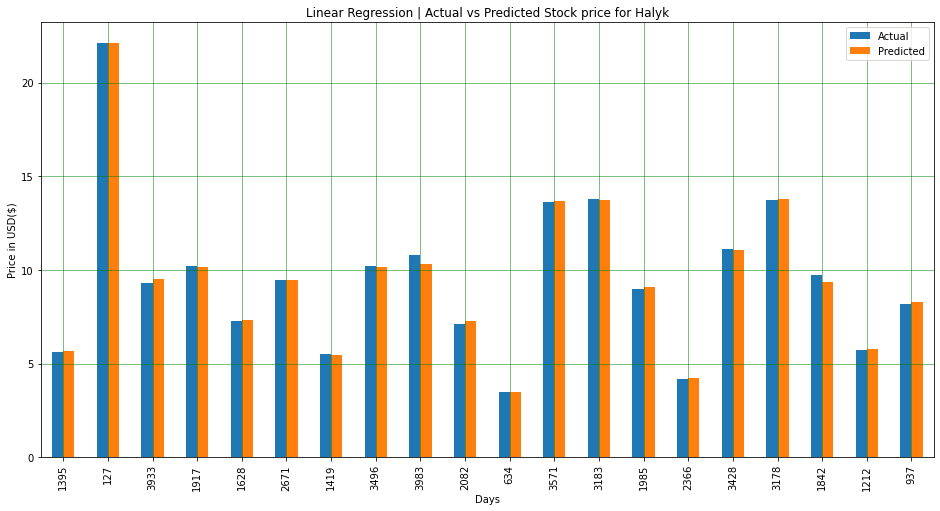

In [23]:
plot_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.title('Linear Regression | Actual vs Predicted Stock price for Halyk')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel('Price in USD($)')
plt.xlabel('Days')
plt.show()

# KNN Model Training and Testing

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(x_train,y_train)
y_knn_pred=knn_model.predict(x_test)

# KNN Cross-Validation


In [25]:
knn_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.51293964795597


# KNN Model - Data Visualization (Results)

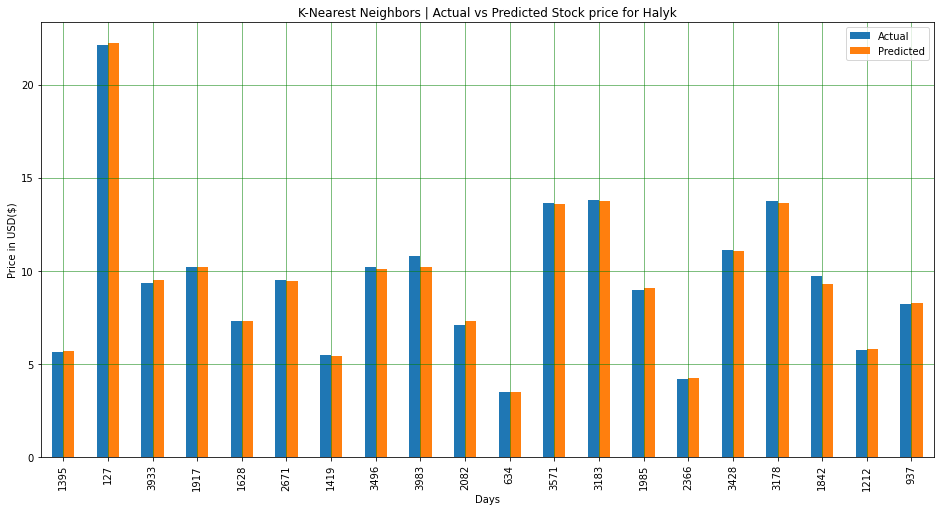

In [26]:
plot_knn_df=pd.DataFrame({'Actual':y_test,'Predicted':y_knn_pred})
plot_knn_df.head(20).plot(kind='bar',figsize=(16,8))
plt.title('K-Nearest Neighbors | Actual vs Predicted Stock price for Halyk')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel('Price in USD($)')
plt.xlabel('Days')
plt.show()

# Linear Kernel SVM Model Training and Testing


In [27]:
from sklearn.svm import SVR
lin_svm_regressor = SVR(kernel='linear')
lin_svm_model=lin_svm_regressor.fit(x_train,y_train)
y_lin_svm_pred=lin_svm_model.predict(x_test)

# Linear Kernel SVM Model Cross-Validation

In [28]:
lin_svm_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(lin_svm_model, x_test, y_test.astype('int'), cv=lin_svm_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  97.94766078952561


# Linear Kernel SVM Model - Data Visualization (Results)

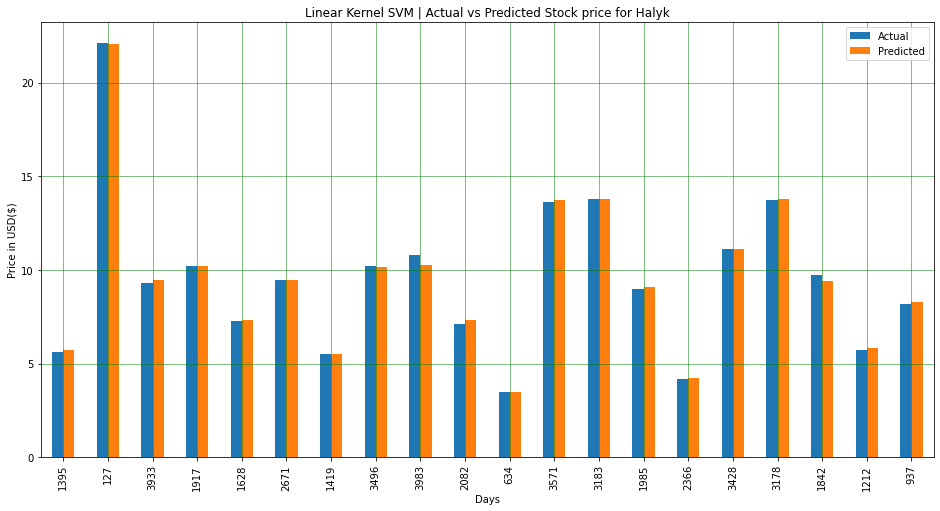

In [29]:
plot_lin_svm_df=pd.DataFrame({'Actual':y_test,'Predicted':y_lin_svm_pred})
plot_lin_svm_df.head(20).plot(kind='bar',figsize=(16,8))
plt.title('Linear Kernel SVM | Actual vs Predicted Stock price for Halyk')
plt.ylabel('Price in USD($)')
plt.xlabel('Days')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Polynomial Kernel SVM Model Training and Testing


In [30]:
from sklearn.svm import SVR
poly_svm_regressor = SVR(kernel='poly')
poly_svm_model=poly_svm_regressor.fit(x_train,y_train)
y_poly_svm_pred=poly_svm_model.predict(x_test)

# Polynomial Kernel SVM Model Cross-Validation

In [31]:
poly_svm_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(poly_svm_model, x_test, y_test.astype('int'), cv=poly_svm_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  69.25228160562102


# Polynomial Kernel SVM Model - Data Visualization (Results)

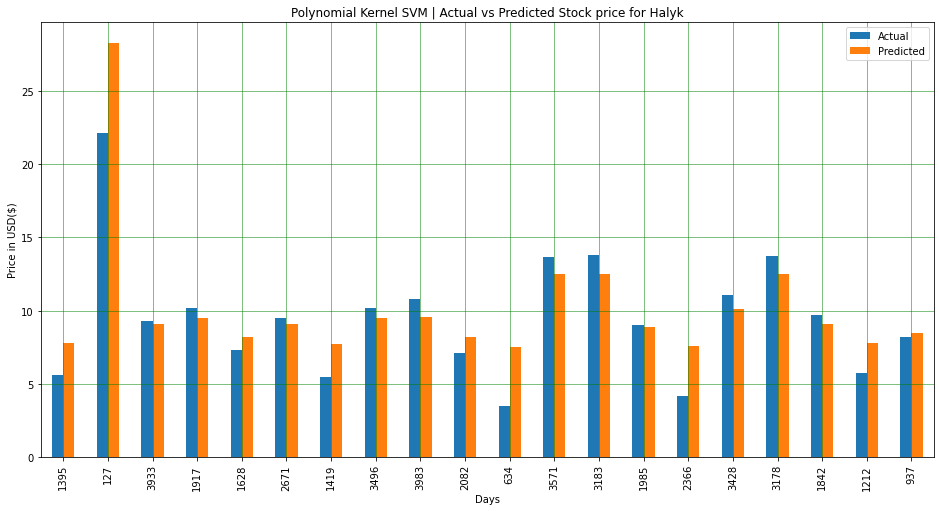

In [32]:
plot_poly_svm_df=pd.DataFrame({'Actual':y_test,'Predicted':y_poly_svm_pred})
plot_poly_svm_df.head(20).plot(kind='bar',figsize=(16,8))
plt.title('Polynomial Kernel SVM | Actual vs Predicted Stock price for Halyk')
plt.ylabel('Price in USD($)')
plt.xlabel('Days')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# RBF Kernel SVM Model Training and Testing


In [33]:
from sklearn.svm import SVR
rbf_svm_regressor = SVR(kernel='rbf')
rbf_svm_model=rbf_svm_regressor.fit(x_train,y_train)
y_rbf_svm_pred=rbf_svm_model.predict(x_test)

# RBF Kernel SVM Model Cross-Validation

In [34]:
rbf_svm_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(rbf_svm_model, x_test, y_test.astype('int'), cv=rbf_svm_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  98.66001030454733


# RBF Kernel SVM Model - Data Visualization (Results)

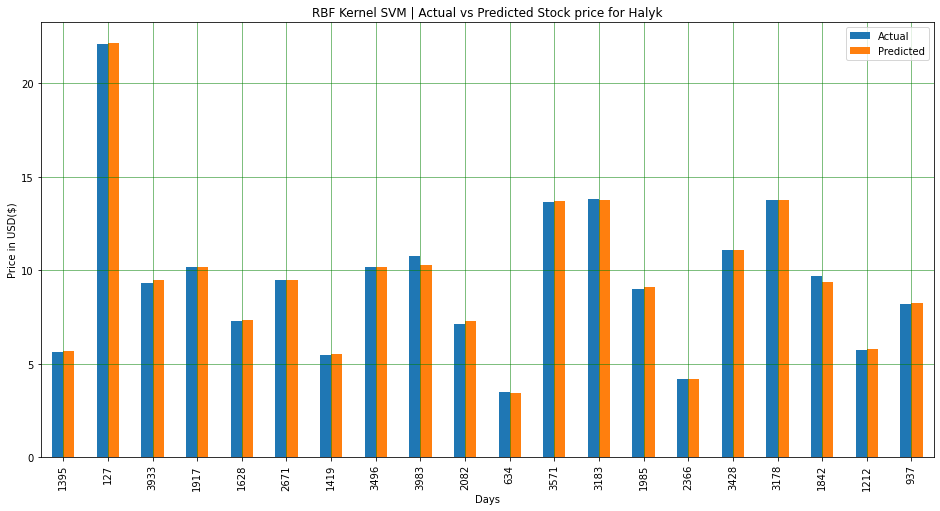

In [35]:
plot_rbf_svm_df=pd.DataFrame({'Actual':y_test,'Predicted':y_rbf_svm_pred})
plot_rbf_svm_df.head(20).plot(kind='bar',figsize=(16,8))
plt.title('RBF Kernel SVM | Actual vs Predicted Stock price for Halyk')
plt.ylabel('Price in USD($)')
plt.xlabel('Days')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# RMSE (Root Mean Square Error)


In [36]:
from sklearn.metrics import mean_squared_error , r2_score
import math

In [37]:
lr_mse=math.sqrt(mean_squared_error(y_test,y_pred))
print('Linear Regression Model Root mean square error: ',lr_mse)
knn_mse=math.sqrt(mean_squared_error(y_test,y_knn_pred))
print('KNN Model Root mean square error: ',knn_mse)
lin_svm_mse=math.sqrt(mean_squared_error(y_test,y_lin_svm_pred))
print('Linear SVM Model Root mean square error: ',lin_svm_mse)
poly_svm_mse=math.sqrt(mean_squared_error(y_test,y_poly_svm_pred))
print('Polynomial SVM Model Root mean square error: ',poly_svm_mse)
rbf_svm_mse=math.sqrt(mean_squared_error(y_test,y_rbf_svm_pred))
print('RBF SVM Model Root mean square error: ',rbf_svm_mse)

Linear Regression Model Root mean square error:  0.4417953504327558
KNN Model Root mean square error:  0.17210093489289996
Linear SVM Model Root mean square error:  0.5061845765462271
Polynomial SVM Model Root mean square error:  2.7350427158374115
RBF SVM Model Root mean square error:  0.37107350147439194


# R2 or r-squared error

In [38]:
print('Linear Regression R2: ', r2_score(y_test, y_pred))
print('KNN R2: ', r2_score(y_test, y_knn_pred))
print('Linear SVM R2: ', r2_score(y_test, y_lin_svm_pred))
print('Polynomial SVM R2: ', r2_score(y_test, y_poly_svm_pred))
print('RBF SVM R2: ', r2_score(y_test, y_rbf_svm_pred))

Linear Regression R2:  0.9899748855585234
KNN R2:  0.9984787047257371
Linear SVM R2:  0.9868397277644285
Polynomial SVM R2:  0.6157841434534446
RBF SVM R2:  0.9929275979442235
